# Student alcohol consumption
Marco Spanò (s1045892) - Peter Horvath (s1042834)

### Problem:

Alcohol has a bad influence on human life. Despite this, alcoholic drinks are nowadays really
common, especially in teenagers’ life that are the ones who suffer the most from the
consequences of it (the effects alcohol has on the brain and everyday’s life).
The dataset we found contains records of students in secondary school that attended math
and portuguese language courses with 33 attributes regarding personal info, alcohol
consumption, grades and more.
Starting from this dataset we are going to make inferences such as the level of alcohol
consumption of a student (based on the other columns) or predicting the grades he/she will
get. Furthermore, we can also explore some characteristics of the dataset, like inspecting
how alcohol influences the grades of a student.
Finally we can try to compare these results with other’s taken from other similar dataset
(students from different countries or older/younger) and see if there is correlation from them.
Dataset: https://www.kaggle.com/uciml/student-alcohol-consumption#student-mat.csv

### Our solution:

Our first aim is to start applying a decision tree classifier (and later on also a random forest)
on the dataset since it is easily understandable and as well as having a good classifier we
can also see which are the variables that most affect the final result.
Secondly we will apply a naive bayes classifier to compare the results we get from the
decision tree to it. Also with the naive classifier we can try to inspect which attributes
contribute the most to predict the outcome.
Eventually we can try to apply a small neural network on the dataset and see if it we can
achieve a better accuracy, even if the dataset is not so big and the probability of it are low.

### Literature:

Paper from the researchers who shared the dataset:
https://bradzzz.gitbooks.io/ga-seattle-dsi/dsi/dsi_05_classification_databases/2.1-lesson/ass
ets/datasets/STUDENT%20ALCOHOL%20CONSUMPTION.pdf
A study on alcohol consumption of undergraduate students in the UK in 2000-2001:
https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-8-163
A similar study also in UK during 2008-2009:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3843305/

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
%matplotlib inline
#reading the two csv files and merging them with 'append'
data_mat = pd.read_csv('student-mat.csv')
data_por = pd.read_csv('student-por.csv')
merged = data_mat.append(data_por)

column_names = merged.columns
classNames = merged.G3.unique()
classNames = np.sort(classNames)
print(classNames)


#we have to use certain columns for removing duplicates (not all of the columns), the column names are given in the .R file
column_names_for_subsetting = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]
merged = merged.drop_duplicates(subset = column_names_for_subsetting).values

print(data_mat.shape)
print(data_por.shape)
print(merged)

[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(395, 33)
(649, 33)
[['GP' 'F' 18 ... 5 6 6]
 ['GP' 'F' 17 ... 5 5 6]
 ['GP' 'F' 15 ... 7 8 10]
 ...
 ['MS' 'F' 18 ... 16 15 15]
 ['MS' 'F' 19 ... 7 8 9]
 ['MS' 'F' 17 ... 6 9 11]]


In [2]:
# creating a categorical encoder with the indices list
# the encoder will encode only those columns which are in the indices
indices = [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]
encoder = ce.ordinal.OrdinalEncoder(cols = indices)

#encoding the selected columns
#the encoder returns a pandas dataframe so we have to use the 'values' again to get the values in a numpy array
merged = encoder.fit_transform(merged)
merged = merged.values
print(merged)
print(merged[:,32])



[[ 1  1 18 ...  5  6  6]
 [ 1  1 17 ...  5  5  6]
 [ 1  1 15 ...  7  8 10]
 ...
 [ 2  1 18 ... 16 15 15]
 [ 2  1 19 ...  7  8  9]
 [ 2  1 17 ...  6  9 11]]
[ 6  6 10 15 10 15 11  6 19 15  9 12 14 11 16 14 14 10  5 10 15 15 16 12
  8  8 11 15 11 11 12 17 16 12 15  6 18 15 11 13 11 12 18 11  9  6 11 20
 14  7 13 13 10 11 13 10 15 15  9 16 11 11  9  9 10 15 12  6  8 16 15 10
  5 14 11 10 10 11 10  5 12 11  6 15 10  8  6 14 10  7  8 18  6 10 14 10
 15 10 14  8  5 17 14  6 18 11  8 18 13 16 19 10 13 19  9 16 14 13  8 13
 15 15 13 13  8 12 11  9  0 18  0  0 12 11  0  0  0  0 12 15  0  9 11 13
 11  0 11 10  0 14 10  0 12  8 13 10 15 12  0  7  0 10  7 12 10 16  0 14
  0 16 10  0  9  9 11  6  9 11  8 17  8 12 11 11 15  9 10 13  9  8 10 14
 15 16 10 18 10 16 10 10  6 11  9  7 13 10  7  8 13 14  8 10 15  4  8  8
 10  6  0 17 13 14  7 15 12  9 12 14 11  9 13  6 10 13 12 11  0 12 12  0
 12  0 18 13  8  5 15  8 10  8  8 12  8 13 11 14  0 18  8 12  9  0 17 10
 11 10  0  9 14 11 14 10 12  9  9  8 10  

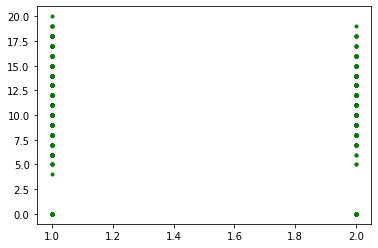

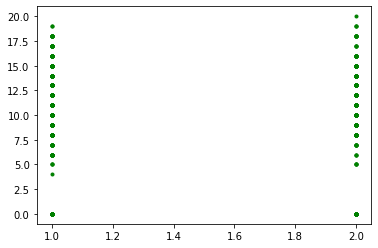

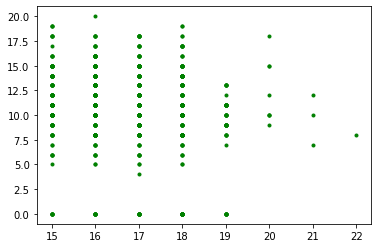

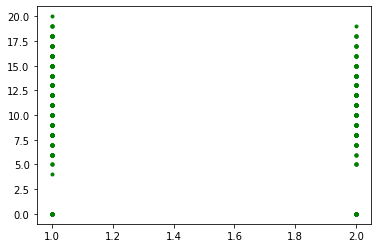

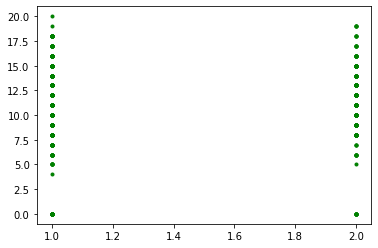

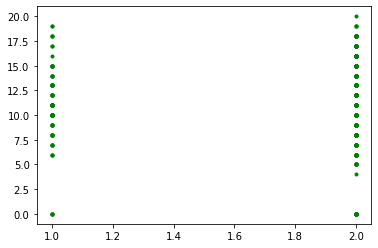

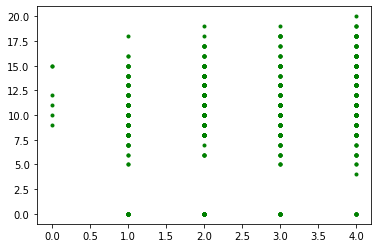

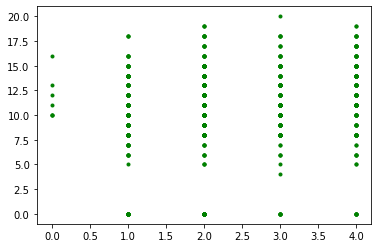

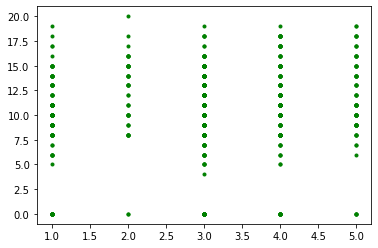

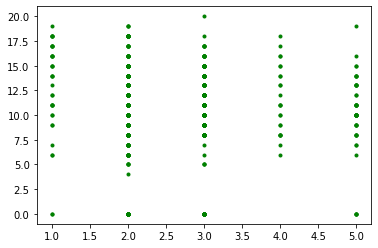

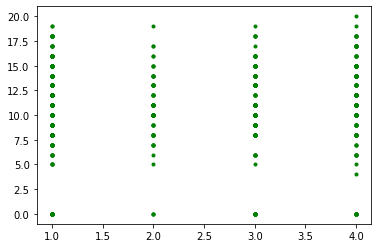

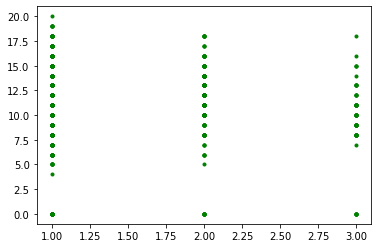

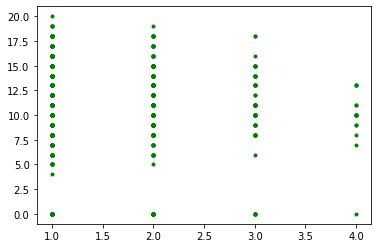

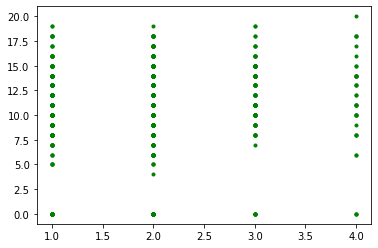

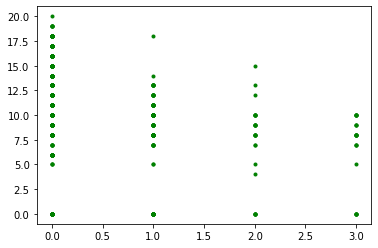

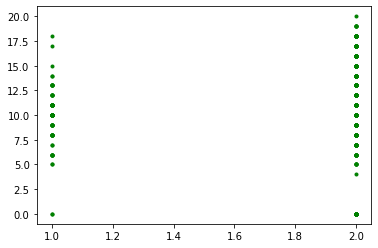

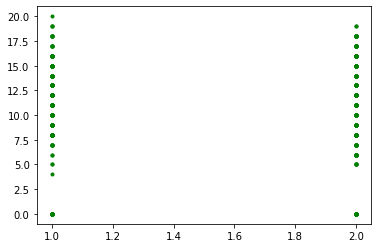

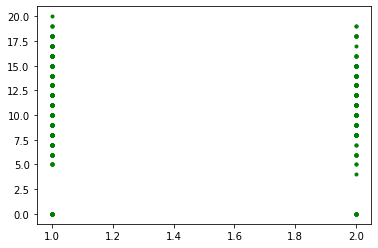

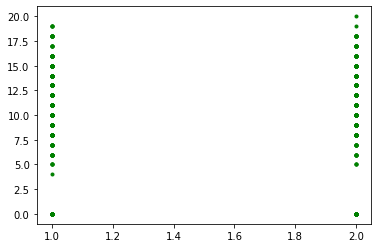

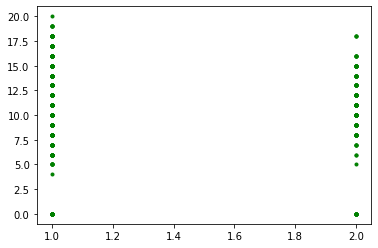

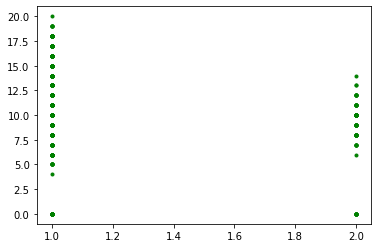

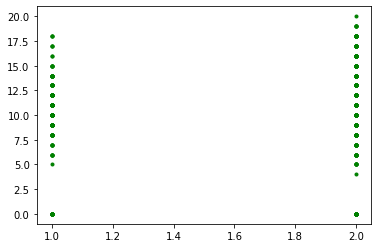

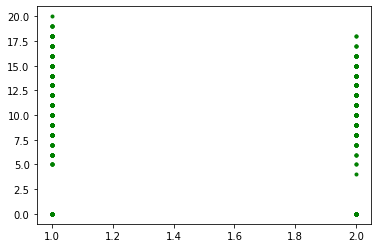

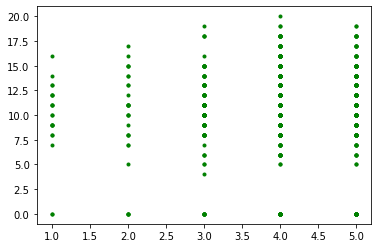

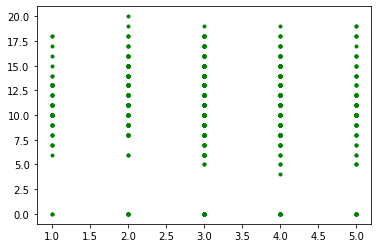

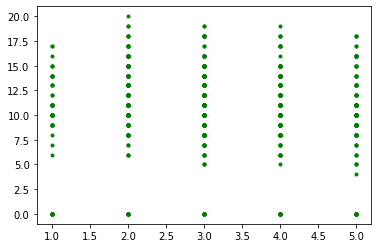

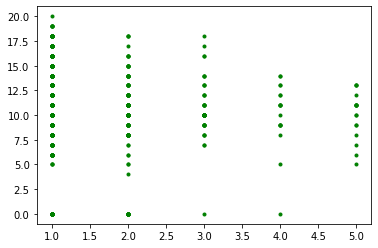

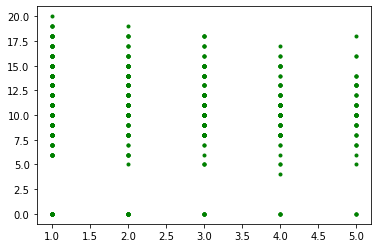

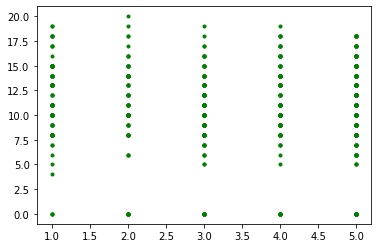

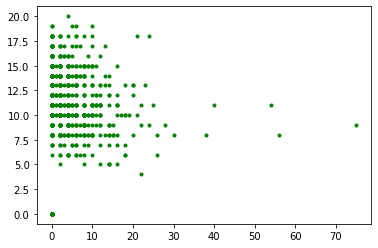

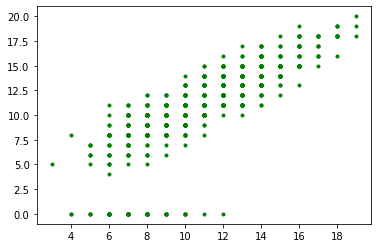

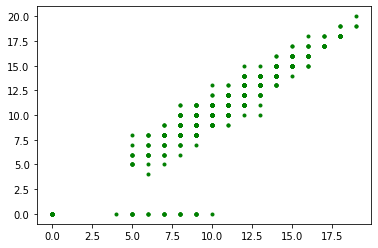

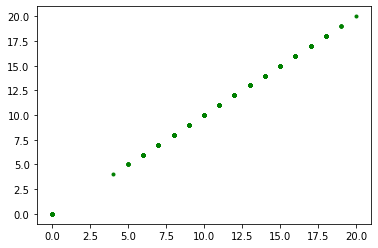

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,33):
    #fig, pc = plt.subplots(1,2,figsize=(10,10))
    #for j in range(1,2):
    plt.plot(merged[:, i], merged[:, 32], 'g.')
    plt.show()
#         pc[0][j].set_title(f'PC {i+1} over PC {j+1}')
#         pc[0][j].set_xlabel(f'PC {i+1}')
#         pc[0][j].set_ylabel(f'PC {j+1}')


plt.tight_layout()
plt.show()

# Preprocessing

In [4]:
#deleting possible outliers, the one with grade 0, 1 or 5
merged = merged[merged[:,32] > 0, :]
#merged = merged[merged[:,32] < 20, :]
print(merged.shape)

(617, 33)


In [3]:
#normalizing the features/attributes

from sklearn import preprocessing

normalized = preprocessing.normalize(merged, axis = 0)

###mention that there is no difference with naive bayes when we normalize i.e. it performs the same(shi*)

# Dividing in training and test

In [6]:
import sklearn.model_selection as skl

#shows how much data you want to put in the testing dataset, the rest goes to the training one
holdout = 0.3

#use the same seed for all the depths
random_seed = 0

#X = np.array(merged[:, :31])
#y = np.array(merged[:, 32])

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=holdout, stratify=y, random_state=random_seed)

(617, 31) (617,)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# Decision Tree Classifier

In [ ]:
from sklearn import tree
from Toolbox.treeprint import tree_print



print("With min_samples_split = 100:\n")
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30)
tree_print(clf.fit(X,y),column_names[:31],classNames)
print("\n")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
print(y_1)
y_2 = regr_2.predict(X_test)

acc_1 = regr_1.score(X_test, y_test)
acc_2 = regr_2.score(X_test, y_test)
print(acc_1, acc_2)

In [ ]:
tree_print(regr_1.fit(X,y),column_names[:31],classNames)

In [ ]:
import graphviz

dot_data = tree.export_graphviz(regr_1, out_file=None, 
                     feature_names=column_names[:31],  
                     class_names=classNames,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Naive-Bayes 

In [9]:
#preparing the data for naive bayes
from sklearn.model_selection import KFold

X = np.array(merged[:,:30]) #30
y = np.array(merged[:,32])

kf = KFold(n_splits = 5)
kf.get_n_splits(X)

5

In [60]:
#creating a  Gaussian naive-bayes model and training it cross-validation for the first problem

acc = [] 
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mnb =  GaussianNB()
    mnb.fit(X_train, y_train) 

    #using the trained model to predict the labels on the test set and display the results
    y_pred = mnb.predict(X_test) 
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    print("Gaussian Naive Bayes model accuracy(in %):", accuracy)
    acc.append(accuracy)

print("The mean accuracy: ", np.mean(acc),'%')

Gaussian Naive Bayes model accuracy(in %): 6.7669172932330826
Gaussian Naive Bayes model accuracy(in %): 5.263157894736842
Gaussian Naive Bayes model accuracy(in %): 9.848484848484848
Gaussian Naive Bayes model accuracy(in %): 2.272727272727273
Gaussian Naive Bayes model accuracy(in %): 9.090909090909092
The mean accuracy:  6.648439280018228 %


In [61]:
#creating a  Gaussian naive-bayes model and training it cross-validation for the binary problem
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

acc = []
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = grades[train_index], grades[test_index]
    
    mnb =  GaussianNB()
    mnb.fit(X_train, y_train) 

    #using the trained model to predict the labels on the test set and display the results
    y_pred = mnb.predict(X_test) 
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    acc.append(accuracy)
    print("Gaussian Naive Bayes model accuracy(in %):", accuracy)
    

print("The mean accuracy: ", np.mean(acc),"%")

Gaussian Naive Bayes model accuracy(in %): 75.18796992481202
Gaussian Naive Bayes model accuracy(in %): 68.42105263157895
Gaussian Naive Bayes model accuracy(in %): 71.96969696969697
Gaussian Naive Bayes model accuracy(in %): 76.51515151515152
Gaussian Naive Bayes model accuracy(in %): 69.6969696969697
The mean accuracy:  72.35816814764183 %


# Neural network and logistic regression

## Preparing the data


In [66]:
#preparing the data for the neural network and logistic regression
# we do not want to reference the original arrays so we create a copy with the np.array() method
X = np.array(normalized[:,:30]) 

grades = np.array(merged[:,32])
grades[grades < 10] = 0
grades[grades >= 10] = 1

## Regression


Model: "sequential_165"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_179 (Dense)            (None, 28)                868       
_________________________________________________________________
dense_180 (Dense)            (None, 18)                522       
_________________________________________________________________
dense_181 (Dense)            (None, 18)                342       
_________________________________________________________________
dense_182 (Dense)            (None, 1)                 19        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________
Train on 397 samples, validate on 265 samples
Epoch 1/100
397/397 [==============================] - 2s 5ms/step - loss: 135.6588 - val_loss: 119.0894
Epoch 2/100
397/397 [==============================] - 0s 327us/step - loss: 124.4470 - val_loss:

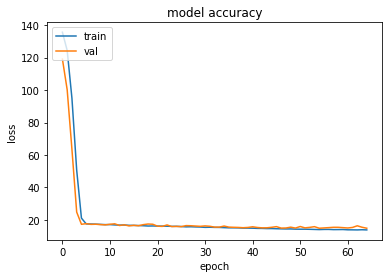

In [57]:
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense 

#creating training and test sets
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=0.4, random_state=0)
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.005, patience = 10)

#building the model
NN_model = Sequential()
NN_model.add(Dense(28, input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(18, input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(18, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#compiling the model
NN_model.compile(loss='mean_squared_error',optimizer=keras.optimizers.RMSprop(learning_rate=1e-3))
NN_model.summary()
             
 #fitting the model            
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose = 1, validation_data=(X_test, y_test),callbacks = [es])

#plotting training and validation(test) results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()       

## Logistic regression

Train on 370 samples, validate on 159 samples
Epoch 1/100
370/370 [==============================] - 1s 3ms/step - loss: 0.6646 - acc: 0.6622 - val_loss: 0.6401 - val_acc: 0.7107
Epoch 2/100
370/370 [==============================] - 0s 768us/step - loss: 0.6395 - acc: 0.6919 - val_loss: 0.6259 - val_acc: 0.7107
Epoch 3/100
370/370 [==============================] - 0s 695us/step - loss: 0.6310 - acc: 0.6919 - val_loss: 0.6190 - val_acc: 0.7107
Epoch 4/100
370/370 [==============================] - 0s 700us/step - loss: 0.6266 - acc: 0.6919 - val_loss: 0.6146 - val_acc: 0.7107
Epoch 5/100
370/370 [==============================] - 0s 838us/step - loss: 0.6238 - acc: 0.6919 - val_loss: 0.6118 - val_acc: 0.7107
Epoch 6/100
370/370 [==============================] - 0s 819us/step - loss: 0.6220 - acc: 0.6919 - val_loss: 0.6098 - val_acc: 0.7107
Epoch 7/100
370/370 [==============================] - 0s 861us/step - loss: 0.6207 - acc: 0.6919 - val_loss: 0.6083 - val_acc: 0.7107
Epoch 8/100

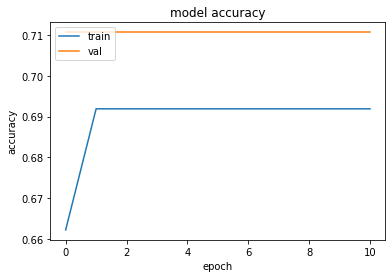

Train on 370 samples, validate on 159 samples
Epoch 1/100
370/370 [==============================] - 1s 3ms/step - loss: 0.6290 - acc: 0.7405 - val_loss: 0.6187 - val_acc: 0.7170
Epoch 2/100
370/370 [==============================] - 0s 753us/step - loss: 0.5989 - acc: 0.7405 - val_loss: 0.6066 - val_acc: 0.7170
Epoch 3/100
370/370 [==============================] - 0s 723us/step - loss: 0.5877 - acc: 0.7405 - val_loss: 0.6013 - val_acc: 0.7170
Epoch 4/100
370/370 [==============================] - 0s 693us/step - loss: 0.5820 - acc: 0.7405 - val_loss: 0.5984 - val_acc: 0.7170
Epoch 5/100
370/370 [==============================] - 0s 716us/step - loss: 0.5783 - acc: 0.7405 - val_loss: 0.5968 - val_acc: 0.7170
Epoch 6/100
370/370 [==============================] - 0s 895us/step - loss: 0.5759 - acc: 0.7405 - val_loss: 0.5958 - val_acc: 0.7170
Epoch 7/100
370/370 [==============================] - 0s 851us/step - loss: 0.5742 - acc: 0.7405 - val_loss: 0.5951 - val_acc: 0.7170
Epoch 8/100

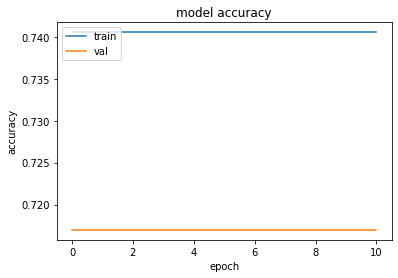

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6394 - acc: 0.7224 - val_loss: 0.6432 - val_acc: 0.6667
Epoch 2/100
371/371 [==============================] - 0s 835us/step - loss: 0.6140 - acc: 0.7224 - val_loss: 0.6372 - val_acc: 0.6667
Epoch 3/100
371/371 [==============================] - 0s 791us/step - loss: 0.6050 - acc: 0.7224 - val_loss: 0.6351 - val_acc: 0.6667
Epoch 4/100
371/371 [==============================] - 0s 682us/step - loss: 0.6000 - acc: 0.7224 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 5/100
371/371 [==============================] - 0s 679us/step - loss: 0.5969 - acc: 0.7224 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 6/100
371/371 [==============================] - 0s 813us/step - loss: 0.5949 - acc: 0.7224 - val_loss: 0.6341 - val_acc: 0.6667
Epoch 7/100
371/371 [==============================] - 0s 712us/step - loss: 0.5934 - acc: 0.7224 - val_loss: 0.6343 - val_acc: 0.6667
Epoch 8/100

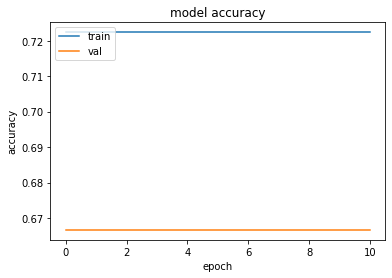

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6697 - acc: 0.6604 - val_loss: 0.6486 - val_acc: 0.6918
Epoch 2/100
371/371 [==============================] - 0s 661us/step - loss: 0.6546 - acc: 0.6658 - val_loss: 0.6388 - val_acc: 0.6918
Epoch 3/100
371/371 [==============================] - 0s 676us/step - loss: 0.6492 - acc: 0.6658 - val_loss: 0.6334 - val_acc: 0.6918
Epoch 4/100
371/371 [==============================] - 0s 679us/step - loss: 0.6461 - acc: 0.6658 - val_loss: 0.6301 - val_acc: 0.6918
Epoch 5/100
371/371 [==============================] - 0s 671us/step - loss: 0.6441 - acc: 0.6658 - val_loss: 0.6278 - val_acc: 0.6918
Epoch 6/100
371/371 [==============================] - 0s 753us/step - loss: 0.6428 - acc: 0.6658 - val_loss: 0.6260 - val_acc: 0.6918
Epoch 7/100
371/371 [==============================] - 0s 689us/step - loss: 0.6418 - acc: 0.6658 - val_loss: 0.6247 - val_acc: 0.6918
Epoch 8/100

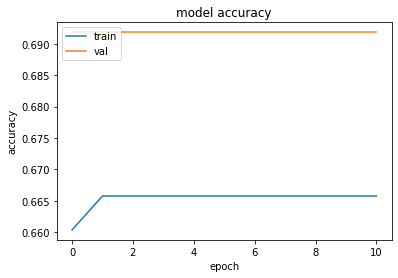

Train on 371 samples, validate on 159 samples
Epoch 1/100
371/371 [==============================] - 1s 3ms/step - loss: 0.6579 - acc: 0.6927 - val_loss: 0.6341 - val_acc: 0.7170
Epoch 2/100
371/371 [==============================] - 0s 682us/step - loss: 0.6268 - acc: 0.7170 - val_loss: 0.6181 - val_acc: 0.7170
Epoch 3/100
371/371 [==============================] - 0s 677us/step - loss: 0.6158 - acc: 0.7170 - val_loss: 0.6105 - val_acc: 0.7170
Epoch 4/100
371/371 [==============================] - 0s 680us/step - loss: 0.6100 - acc: 0.7170 - val_loss: 0.6061 - val_acc: 0.7170
Epoch 5/100
371/371 [==============================] - 0s 779us/step - loss: 0.6065 - acc: 0.7170 - val_loss: 0.6032 - val_acc: 0.7170
Epoch 6/100
371/371 [==============================] - 0s 700us/step - loss: 0.6041 - acc: 0.7170 - val_loss: 0.6011 - val_acc: 0.7170
Epoch 7/100
371/371 [==============================] - 0s 749us/step - loss: 0.6024 - acc: 0.7170 - val_loss: 0.5996 - val_acc: 0.7170
Epoch 8/100

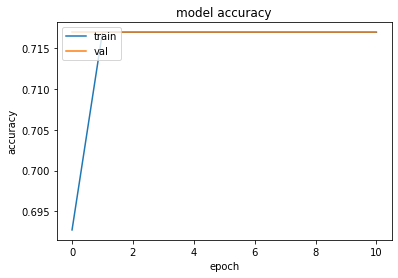

Mean accuracy on test sets: 0.6606494777157519


In [68]:
acc = []

kf = KFold(n_splits = 5)
kf.get_n_splits(X)

#using K-fold cross validation for more reliable results
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = grades[train_index], grades[test_index]
    
    y_train = keras.utils.to_categorical(y_train, num_classes=2, dtype='float32')
    y_test = keras.utils.to_categorical(y_test, num_classes=2, dtype='float32')
    
    X_train, X_val, y_train, y_val = skl.train_test_split(X_train, y_train, test_size=0.3, random_state=0)
    
    #building the model
    NN_model = Sequential()
    NN_model.add(Dense(2,input_dim = X_train.shape[1], activation='softmax'))
    NN_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adagrad(learning_rate=1e-2), metrics=['acc'])
   
    #using early stopping to avoid overfitting
    es = EarlyStopping(monitor = 'val_loss', min_delta = 0.05, patience = 10)
    history = NN_model.fit(X_train, y_train, epochs = 100, batch_size = 4, verbose = 1, validation_data = (X_val, y_val), callbacks = [es])
    test_acc = NN_model.evaluate(X_test,y_test)
    acc.append(test_acc)
    
    #plotting training and validations results
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

print("Mean accuracy on test sets:", np.mean(acc))
